# Aggregate

Plot fusion results across all files

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os

In [75]:
with open('config.json') as f:
    data = json.load(f)

if (data['dirName'] != ""):
    full_path = f"{data['dirPath']}/{data['dirName']}"
else:
    # get the most recently run experiment
    path = data['dirPath']
    folder_names = sorted([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
    print(folder_names)
    most_recent = folder_names[-1]
    print(f"defaulting to most recent experiment: {most_recent}")
    full_path = f"{path}/{most_recent}"

['2025_05_08_14:19:09.987604', '2025_05_08_14:28:26.813704', '2025_05_14_08:14:16.516952', '2025_05_14_09:36:55.196029']
defaulting to most recent experiment: 2025_05_14_09:36:55.196029


In [76]:
csv_path = f"{full_path}/aggregate.csv"
img_path = f"{full_path}/aggregate.png"

In [77]:
df = pd.read_csv(csv_path)

In [78]:
df.head()

,rule_title,rule_description,user_defined_key,total_instructions,instructions_after_fuse,instructions_fused,percentage_fused,average_fusion_length
0,arithmetic end memory/branch,NaN,l-0,271036826384,121743250057,149293576327,55.082395,2.226299
1,arithmetic end memory/branch,NaN,l-1,271036826384,271036826384,0,0.000000,1.000000
2,arithmetic end memory/branch,NaN,l-2,271036826384,159012032940,112024793444,41.331946,1.704505
3,arithmetic end memory/branch,NaN,l-3,271036826384,135583425782,135453400602,49.976013,1.999041
4,arithmetic end memory/branch,NaN,l-4,271036826384,127403627574,143633198810,52.993979,2.127387


In [79]:
# allowed_titles = ['arithmetic end memory/branch']
# df = df[df['rule_title'].isin(allowed_titles)]

grouped = df.groupby(['rule_title'], dropna=False, sort=False)

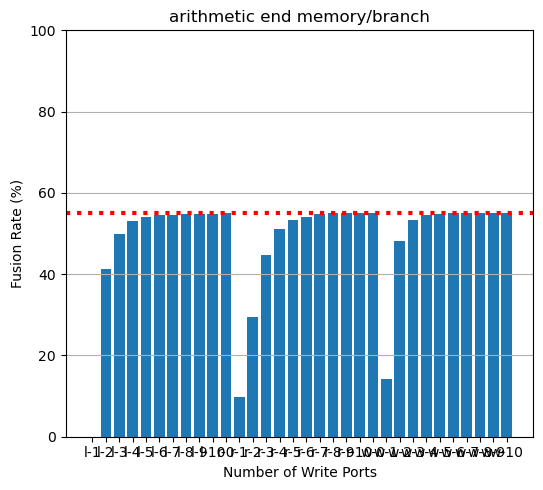

In [80]:
num_groups = len(grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    data = group_data.reset_index()
    first_value = data['percentage_fused'].iloc[0]
    axes[i].axhline(y=first_value, color='red', linestyle='dotted', linewidth=3)
    axes[i].bar(data['user_defined_key'][1:101], data['percentage_fused'][1:101])
    axes[i].set_title(f'{group_name}')
    axes[i].set_xlabel('Number of Write Ports')
    axes[i].set_ylabel('Fusion Rate (%)')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].set_ylim(bottom=0, top=100)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()

In [81]:
df['category'] = df['user_defined_key'].str[0]  # 'l', 'r', or 'w'
df['x_value'] = df['user_defined_key'].str[2:].astype(int)  # numeric part

In [82]:
allowed_titles = ['w']
df = df[df['category'].isin(allowed_titles)]

grouped = df.groupby(['rule_title', 'category'], dropna=False, sort=False)

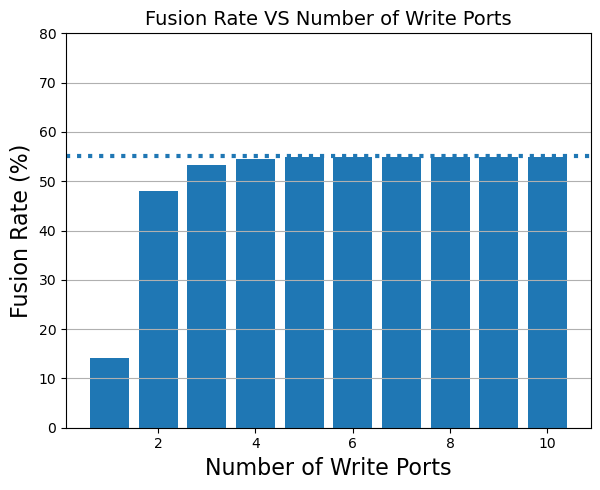

In [ ]:
num_groups = len(grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    data = group_data.reset_index()
    first_value_instructions = data['percentage_fused'].iloc[0]
    axes[i].axhline(y=first_value_instructions, linestyle='dotted', linewidth=3, color='red')
    axes[i].bar(data['x_value'][1:101], data['percentage_fused'][1:101], label='Instruction Count')

    xlabel_map = {
        'l': 'Maximum Fusable Length',
        'r': 'Number of Read Ports',
        'w': 'Number of Write Ports',
    }
    axes[i].set_title(f'Fusion Rate VS {xlabel_map[group_name[1]]}', fontsize=14)
    axes[i].set_xlabel(xlabel_map[group_name[1]], fontsize=16)
    axes[i].set_ylabel('Fusion Rate (%)', fontsize=16)
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].set_ylim(bottom=0, top=80)

    # axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()